In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
#LineGraph

In [7]:
gas = pd.read_csv("gas_prices.csv")
gas.head(2)


,Year,Australia,Canada,France,Germany,Italy,Japan,Mexico,South Korea,UK,USA
0,1990,NaN,1.87,3.63,2.65,4.59,3.16,1.0,2.05,2.82,1.16
1,1991,1.96,1.92,3.45,2.90,4.50,3.46,1.3,2.49,3.01,1.14


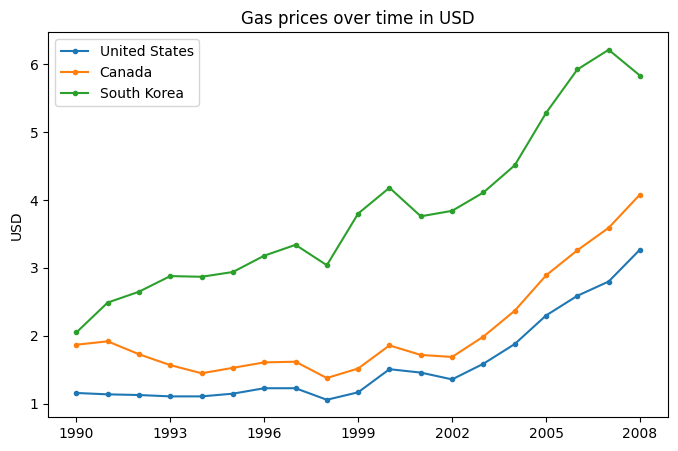

In [48]:
plt.figure(figsize = (8,5))
plt.plot(gas.Year, gas.USA, label = "United States", marker = ".")
plt.title("Gas prices over time in USD")
plt.plot(gas.Year, gas.Canada,  label = "Canada", marker = ".")
plt.plot(gas.Year, gas["South Korea"],  label = "South Korea", marker = ".")
plt.legend()
plt.xticks(gas.Year[::3])
plt.ylabel('USD')

plt.show()

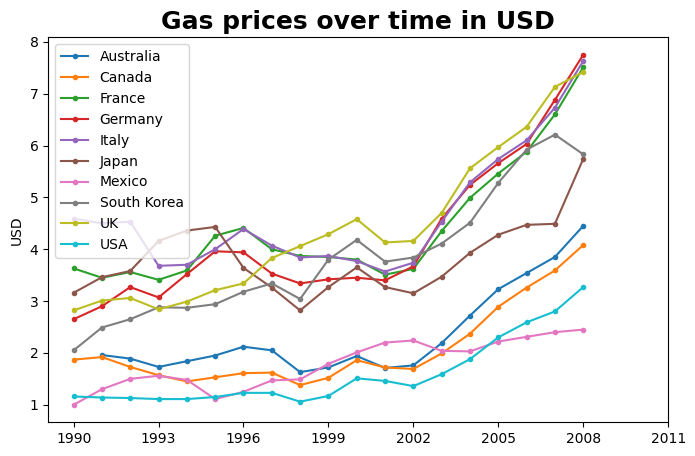

In [72]:
plt.figure(figsize = (8,5))
plt.title("Gas prices over time in USD", fontdict = {'fontweight': "bold", 'fontsize': 18})
for country in gas:
    if country != "Year":
        plt.plot(gas.Year, gas[country], marker = ".", label = country)
        
plt.legend()
plt.xticks(gas.Year[::3].tolist()+[2011])
plt.ylabel('USD')
plt.savefig('Gas_price.png', dpi = 300)
plt.show()

In [73]:
##Load Fifa Data

In [75]:
fifa = pd.read_csv("fifa_data.csv")
fifa.head(3)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M


In [76]:
# Histogram

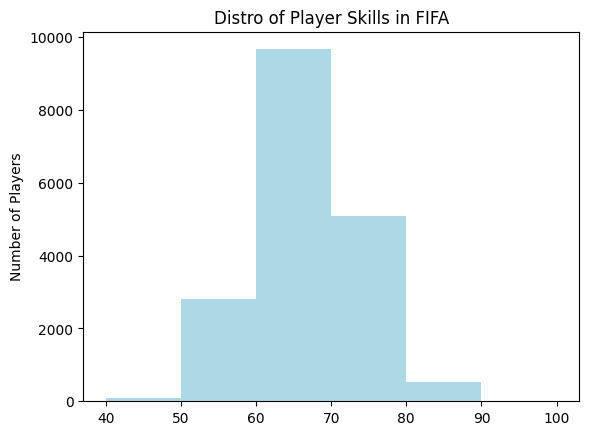

In [87]:
plt.title("Distro of Player Skills in FIFA")
bins = [40,50,60,70,80,90,100]
plt.hist(fifa.Overall, bins = bins, color = "lightblue")
plt.xticks(bins)
plt.ylabel("Number of Players")
plt.show()

In [88]:
# Pie Chart

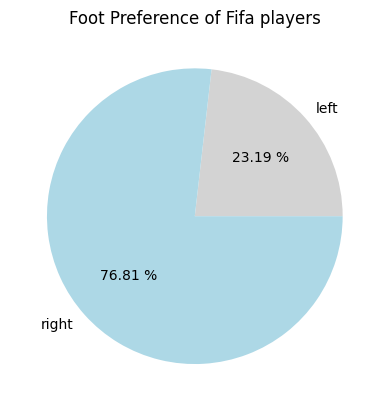

In [113]:
plt.title("Foot Preference of Fifa players")
left = fifa.loc[fifa['Preferred Foot']== "Left"].count()[0]
right = fifa.loc[fifa['Preferred Foot']== "Right"].count()[0]
labels = ["left", "right"]
colors = ["lightgray", "lightblue"]
plt.pie([left, right], labels = labels, colors = colors, autopct = "%.2f %%")
plt.show()

In [114]:
# Pie Chart no. 2

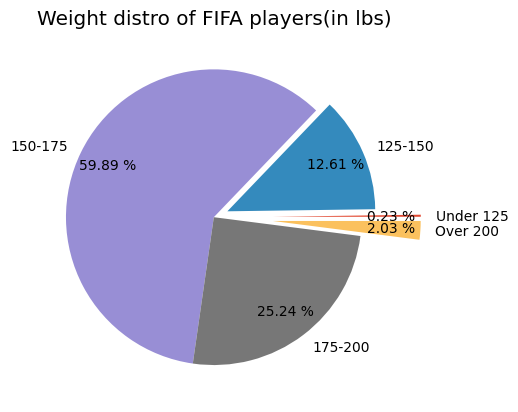

In [129]:
plt.title("Weight distro of FIFA players(in lbs)")
fifa.Weight = [int(x.strip('lbs')) if type(x)== str else x for x in fifa.Weight]
plt.style.use("ggplot")
light1 = fifa.loc[fifa.Weight < 125].count()[0]
light2 = fifa.loc[(fifa.Weight >= 125) & (fifa.Weight < 150) ].count()[0]
medium = fifa.loc[(fifa.Weight >= 150) & (fifa.Weight < 175) ].count()[0]
heavy1 = fifa.loc[(fifa.Weight >= 175) & (fifa.Weight < 200) ].count()[0]
heavy2 = fifa.loc[(fifa.Weight >= 200)].count()[0]
weights = [light1, light2, medium, heavy1, heavy2]
labels = ["Under 125", "125-150", "150-175", "175-200", "Over 200"]
explode = (.4,.1,0,0,.4)
plt.pie(weights, labels = labels, autopct = "%.2f %%" , pctdistance = 0.8, explode = explode)
plt.show()

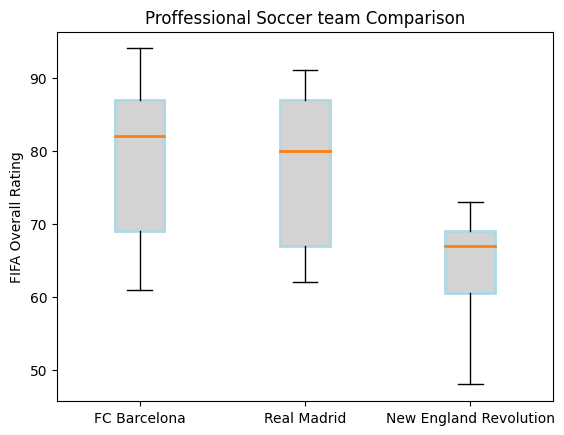

In [163]:
plt.title("Proffessional Soccer team Comparison")
# plt.figure(figsize = (5,8))
plt.style.use("default")

barcelona = fifa.loc[fifa.Club == "FC Barcelona"]["Overall"]
madrid = fifa.loc[fifa.Club == "Real Madrid"]["Overall"]
revs = fifa.loc[fifa.Club == "New England Revolution"]["Overall"]

labels = ["FC Barcelona", "Real Madrid", "New England Revolution"]

boxes = plt.boxplot([barcelona, madrid, revs], labels = labels, patch_artist = True, medianprops = {"linewidth": 2}) 
# patch_artist = True(did this to add facecolor), medianprops to set properties of orange line

# can use this method if want to set different proprties for each box

for box in boxes["boxes"]:
    # Set edge color
    box.set(color = "lightblue", linewidth = 2)
    # Set Fill color
    box.set(facecolor = "lightgray")


plt.ylabel("FIFA Overall Rating")
plt.show()